In [2]:
import pandas as pd
import numpy as np

agg_data = pd.read_csv("agg_data4.csv")
agg_data.head()

,pdf,project_name,multiple_phases,number_countries,eval_year,number_sectors,number_subsectors,mean_investment,number_funding_source,number_carrier_type,...,count_dominieren_die,count_unzureichend,count_geringen,count_maengel,count_nicht_erfolgreich,count_nicht_erfolgreiche,count_ueberwiegend_nicht,count_auch_nicht,count_ueberwiegend_nicht_erfolgreich,count_vorhaben_ist_nutzlos
0,%C3%84gypten_Qena_2022_D.pdf,Kommunale Wasserver- und Abwasserentsorgung Qena,0,1,2022,1,1,12670000.0,1,1,...,2,4,7,3,9,4,2,1,2,1
1,%C3%84gypten_Umwelt_2022_D.pdf,Förderung von Umweltschutzmaßnahmen der privat...,0,1,2022,1,1,25780000.0,1,1,...,2,6,5,1,6,3,2,1,2,1
2,%C3%84thiopien_Gavi_2022_D.pdf,Impfprogrammförderung in Äthiopien in Zusammen...,0,1,2022,1,1,10000000.0,1,1,...,0,1,0,1,3,1,0,2,0,0
3,Afrika_TCX_2012_D.pdf,Lokalwährungsfonds TCX,0,1,2012,1,1,90000000.0,1,1,...,2,1,0,1,2,2,0,1,0,1
4,Albanien_Elbasan_2011.pdf,Wirtschaftsförderung durch Ausbau kommunaler I...,0,1,2011,1,1,10600000.0,1,1,...,2,3,0,1,2,2,0,2,0,1


In [3]:
validation_data = agg_data.sample(frac=0.1, random_state = 123)
train_test_data = agg_data.drop(validation_data.index)
train_test_data.shape, validation_data.shape

((665, 58), (74, 58))

In [17]:
# Define FEATURES and TARGET
FEATURES = ['multiple_phases', 'number_countries', 'number_sectors', 'number_subsectors', 'number_funding_source', 
            'number_carrier_type', 'adaptive_management', 'word_count', 'character_count', 'word_density', 
            'count_deutlich', 'count_gut', 'count_erreicht', 'count_erfolgreich', 'count_verbesserungen', 
            'count_erfuellt', 'count_umsetzung', 'count_zutreffend', 'count_verbesserung_der', 'count_beitrag_zur', 
            'count_mit_hoher_wahrscheinlichkeit', 'count_deutlich_ueber_den', 'count_gute', 'count_teilweise', 
            'count_allerdings', 'count_positiv', 'count_positive', 'count_positiver', 'count_wirksamkeit_des_vorhabens', 
            'count_bisher_positive', 'count_positive_entwicklungspolitische_wirksamkeit', 'count_unter_den_erwartungen', 
            'count_die_negativen_ergebnisse', 'count_dominieren_die', 'count_unzureichend', 'count_geringen', 
            'count_maengel', 'count_nicht_erfolgreich', 'count_nicht_erfolgreiche', 'count_ueberwiegend_nicht', 
            'count_auch_nicht', 'count_ueberwiegend_nicht_erfolgreich', 'count_vorhaben_ist_nutzlos']

TARGET = 'overall_rating'

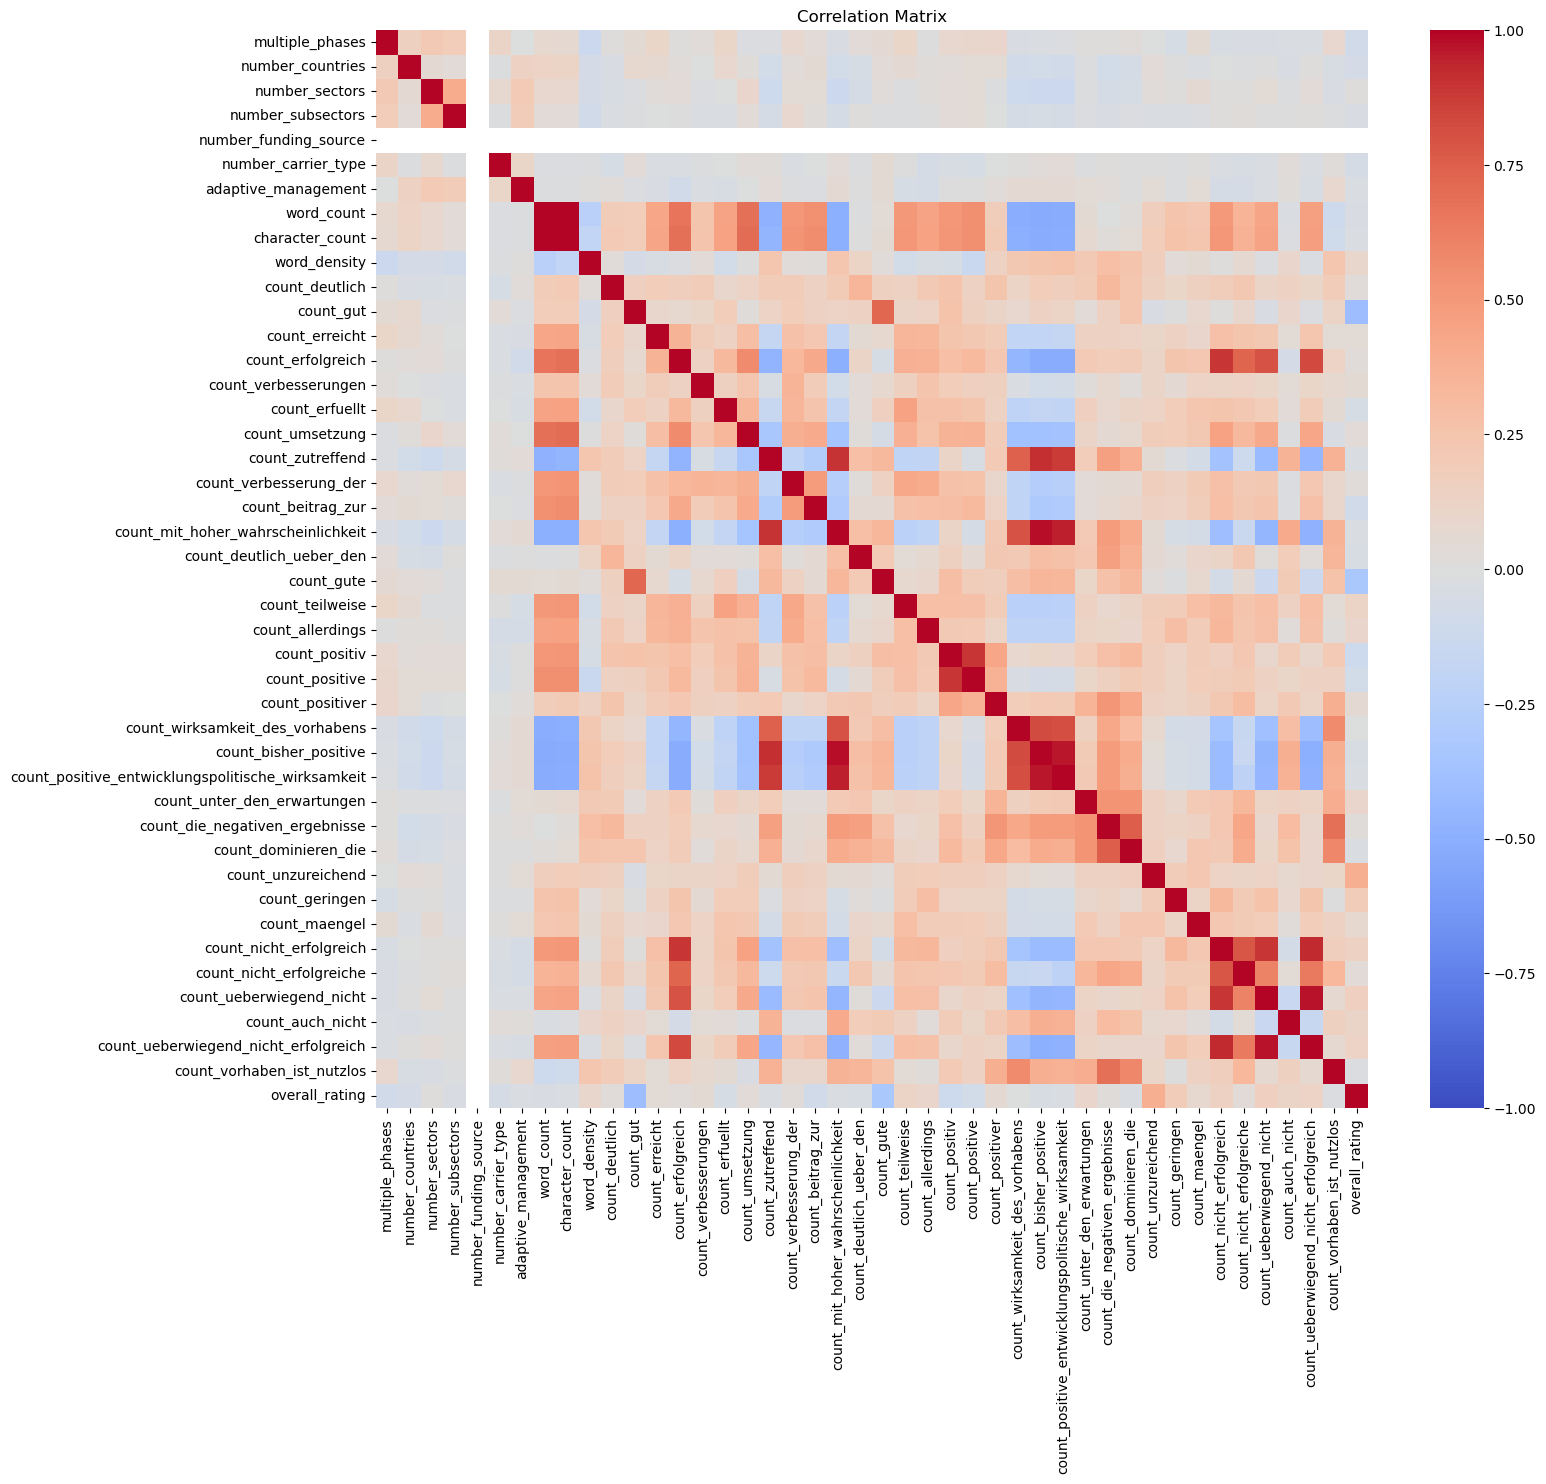

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = FEATURES + [TARGET]
corr_matrix = agg_data[selected_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

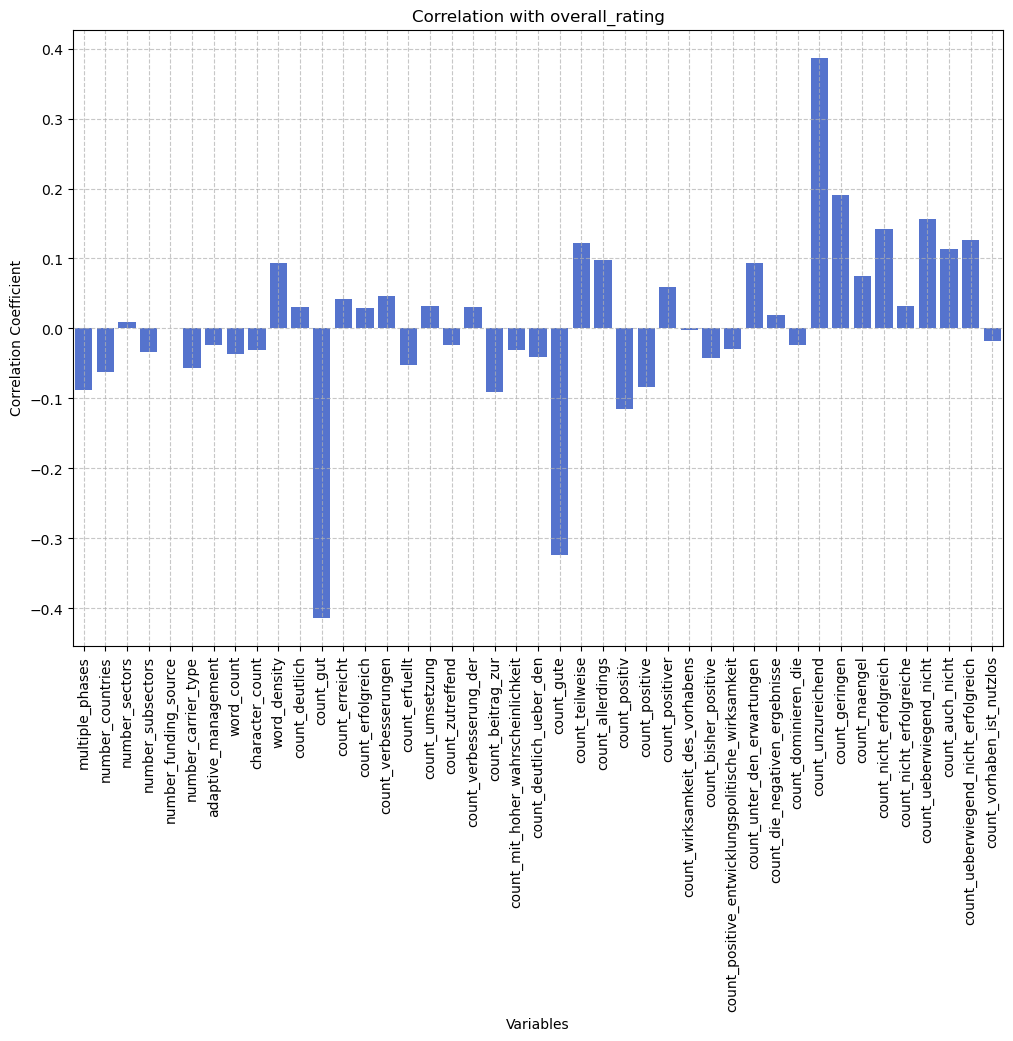

In [22]:
# Compute the correlation matrix
corr_matrix = agg_data[FEATURES + [TARGET]].corr()

# Extract the correlations with the TARGET variable
target_corr = corr_matrix[TARGET].drop(TARGET)

# Plot the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.index, y=target_corr.values, color='royalblue')  # Use color instead of palette
plt.title(f'Correlation with {TARGET}')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Add a light grid
plt.grid(True, linestyle='--', alpha=0.7)  # Light dashed grid

plt.show()

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

X = train_test_data[FEATURES]
y = train_test_data[TARGET]

# Initialize the regression model
model = LinearRegression()

# Perform cross-validation and calculate RMSE for each fold
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

# Calculate the average RMSE
average_rmse = rmse_scores.mean()

# Output the RMSE scores and the average RMSE
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {average_rmse}")


RMSE scores for each fold: [0.62208573 0.821648   0.8920183  0.69603468 0.65661339 0.71801805
 0.6201818  0.79802911 0.73891483 0.77872909]
Average RMSE: 0.7342272982052225


In [13]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

X = train_test_data[FEATURES]
y = train_test_data[TARGET]

# Initialize the Gradient Boosting model
model = GradientBoostingRegressor()

# Perform cross-validation and calculate RMSE for each fold
neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-neg_mse_scores)

# Calculate the average RMSE
average_rmse = rmse_scores.mean()

# Perform cross-validation and calculate MAE for each fold
neg_mae_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=10)
mae_scores = -neg_mae_scores  # Cross_val_score returns negative values for MAE, so we need to invert the sign

# Calculate the average MAE
average_mae = mae_scores.mean()

# Perform cross-validation and calculate R-squared for each fold
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=10)

# Calculate the average R-squared
average_r2 = r2_scores.mean()

# Output the scores and the averages
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {average_rmse}")
print(f"MAE scores for each fold: {mae_scores}")
print(f"Average MAE: {average_mae}")
print(f"R-squared scores for each fold: {r2_scores}")
print(f"Average R-squared: {average_r2}")


RMSE scores for each fold: [0.69028592 0.72594925 0.67388043 0.69698605 0.56809255 0.65819815
 0.56467114 0.75636678 0.53065515 0.72274693]
Average RMSE: 0.6587832349310634
MAE scores for each fold: [0.53650989 0.57701269 0.5133306  0.54573233 0.43813789 0.51596608
 0.46368361 0.59987148 0.41247712 0.5852516 ]
Average MAE: 0.5187973286709637
R-squared scores for each fold: [0.41154728 0.38682078 0.53810212 0.46101331 0.40313201 0.42390684
 0.41920609 0.28885008 0.46670462 0.36201764]
Average R-squared: 0.41613007628711296
